# **Convex**

# **Saddle Point**

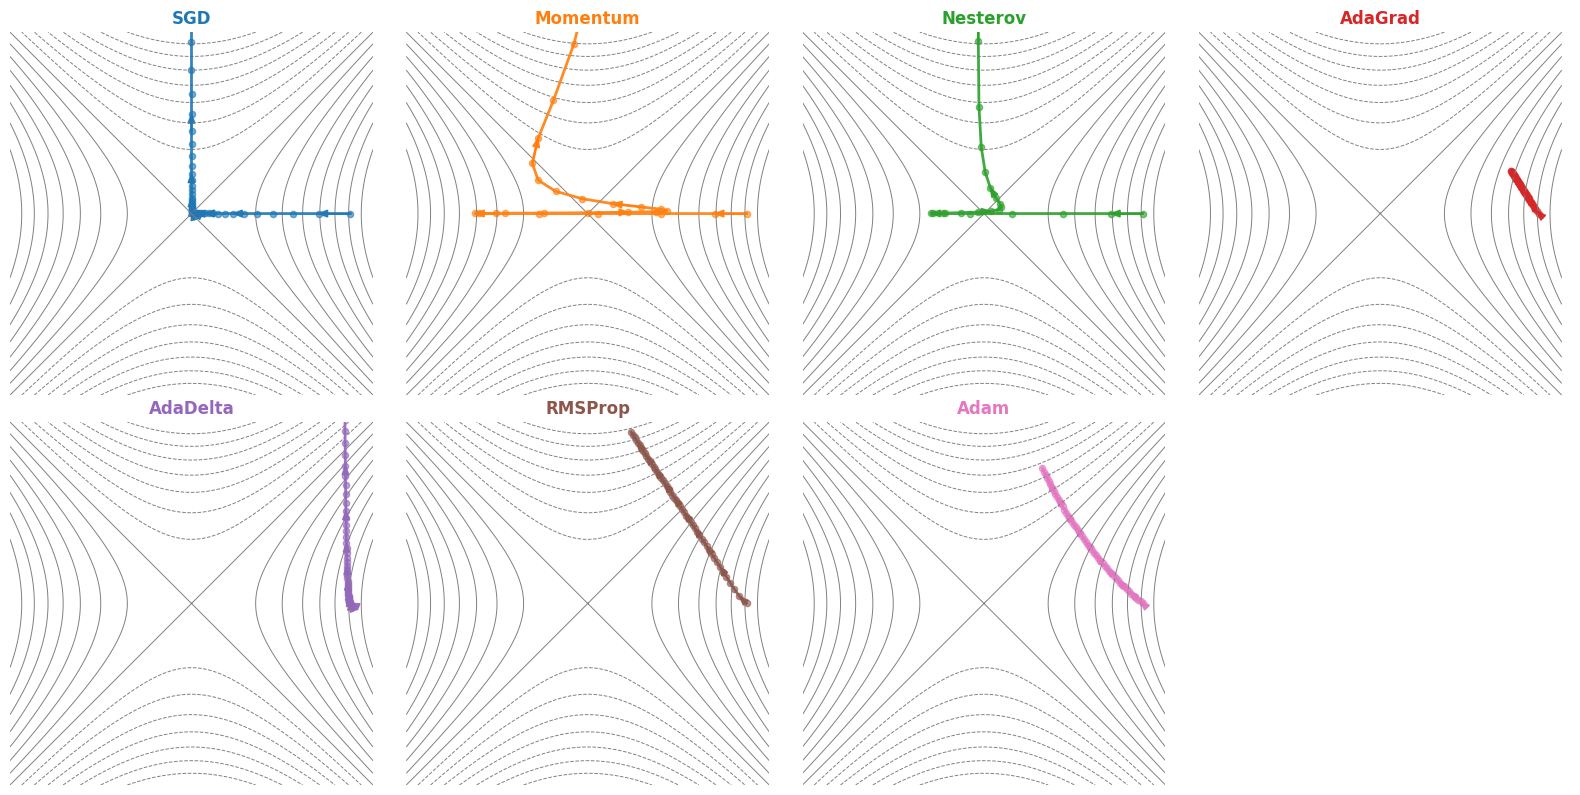

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Loss Function & Gradient 
def saddle_loss_fn(x, y):
    return x**2 - y**2

def grad_saddle(x):
    return np.array([2 * x[0], -2 * x[1]])

# Optimizer
def sgd(x_start, step, grad_fn, iteration=50):
    x = np.array(x_start, dtype='float64')
    trace = [x.copy()]
    for _ in range(iteration):
        grad = grad_fn(x)
        x -= step * grad
        trace.append(x.copy())
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(trace)

def momentum(x_start, step, grad_fn, discount=0.9, iteration=50):
    x = np.array(x_start, dtype='float64')
    trace = [x.copy()]
    v = np.zeros_like(x)
    for _ in range(iteration):
        grad = grad_fn(x)
        v = discount * v + grad
        x -= step * v
        trace.append(x.copy())
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(trace)

def nesterov(x_start, step, grad_fn, discount=0.9, iteration=50):
    x = np.array(x_start, dtype='float64')
    trace = [x.copy()]
    v = np.zeros_like(x)
    for _ in range(iteration):
        future_x = x - step * discount * v
        grad = grad_fn(future_x)
        v = discount * v + grad
        x -= step * v
        trace.append(x.copy())
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(trace)

def adagrad(x_start, step, grad_fn, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    trace = [x.copy()]
    G = np.zeros_like(x)
    for _ in range(iteration):
        grad = grad_fn(x)
        G += grad**2
        x -= step * grad / (np.sqrt(G) + delta)
        trace.append(x.copy())
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(trace)

def adadelta(x_start, step, grad_fn, rho=0.95, delta=1e-6, iteration=50):
    x = np.array(x_start, dtype='float64')
    trace = [x.copy()]
    Eg = np.zeros_like(x)
    Edx = np.zeros_like(x)
    for _ in range(iteration):
        grad = grad_fn(x)
        Eg = rho * Eg + (1 - rho) * grad**2
        dx = - (np.sqrt(Edx + delta) / np.sqrt(Eg + delta)) * grad
        x += dx
        Edx = rho * Edx + (1 - rho) * dx**2
        trace.append(x.copy())
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(trace)

def rmsprop(x_start, step, grad_fn, rho=0.9, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    trace = [x.copy()]
    Eg = np.zeros_like(x)
    for _ in range(iteration):
        grad = grad_fn(x)
        Eg = rho * Eg + (1 - rho) * grad**2
        x -= step * grad / (np.sqrt(Eg) + delta)
        trace.append(x.copy())
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(trace)

def adam(x_start, step, grad_fn, beta1=0.9, beta2=0.999, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    trace = [x.copy()]
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for t in range(1, iteration + 1):
        grad = grad_fn(x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        x -= step * m_hat / (np.sqrt(v_hat) + delta)
        trace.append(x.copy())
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(trace)

#  Visualization Method
def saddle_loss_contour(ax):
    x = np.linspace(-8, 8, 400)
    y = np.linspace(-8, 8, 400)
    X, Y = np.meshgrid(x, y)
    Z = saddle_loss_fn(X, Y)
    ax.contour(X, Y, Z, levels=20, colors='gray', linewidths=0.7)

optimizer_functions = {
    "SGD": sgd,
    "Momentum": momentum,
    "Nesterov": nesterov,
    "AdaGrad": adagrad,
    "AdaDelta": adadelta,
    "RMSProp": rmsprop,
    "Adam": adam
}

optimizer_colors = {
    "SGD": "#1f77b4",
    "Momentum": "#ff7f0e",
    "Nesterov": "#2ca02c",
    "AdaGrad": "#d62728",
    "AdaDelta": "#9467bd",
    "RMSProp": "#8c564b",
    "Adam": "#e377c2"
}

import matplotlib.cm as cm
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

def plot_color_arrow_trajectory(ax, trace, name):
    saddle_loss_contour(ax)
    color = optimizer_colors[name]
    ax.plot(trace[:, 0], trace[:, 1], color=color, linewidth=2, alpha=0.9)
    ax.scatter(trace[:, 0], trace[:, 1], color=color, s=20, alpha=0.6)
    for i in range(0, len(trace)-1, max(1, len(trace)//10)):
        start = trace[i]
        end = trace[i+1]
        dx, dy = end - start
        ax.arrow(start[0], start[1], dx, dy,
                 head_width=0.3, head_length=0.4, fc=color, ec=color,
                 length_includes_head=True, alpha=0.9)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(name, fontsize=12, fontweight='bold', color=color)

x0_saddle = [7.0, 0.001]
for i, (name, fn) in enumerate(optimizer_functions.items()):
    traj = fn(x0_saddle, 0.1, grad_saddle)
    plot_color_arrow_trajectory(axs[i], traj, name)

axs[-1].axis('off')
plt.tight_layout()
plt.show()

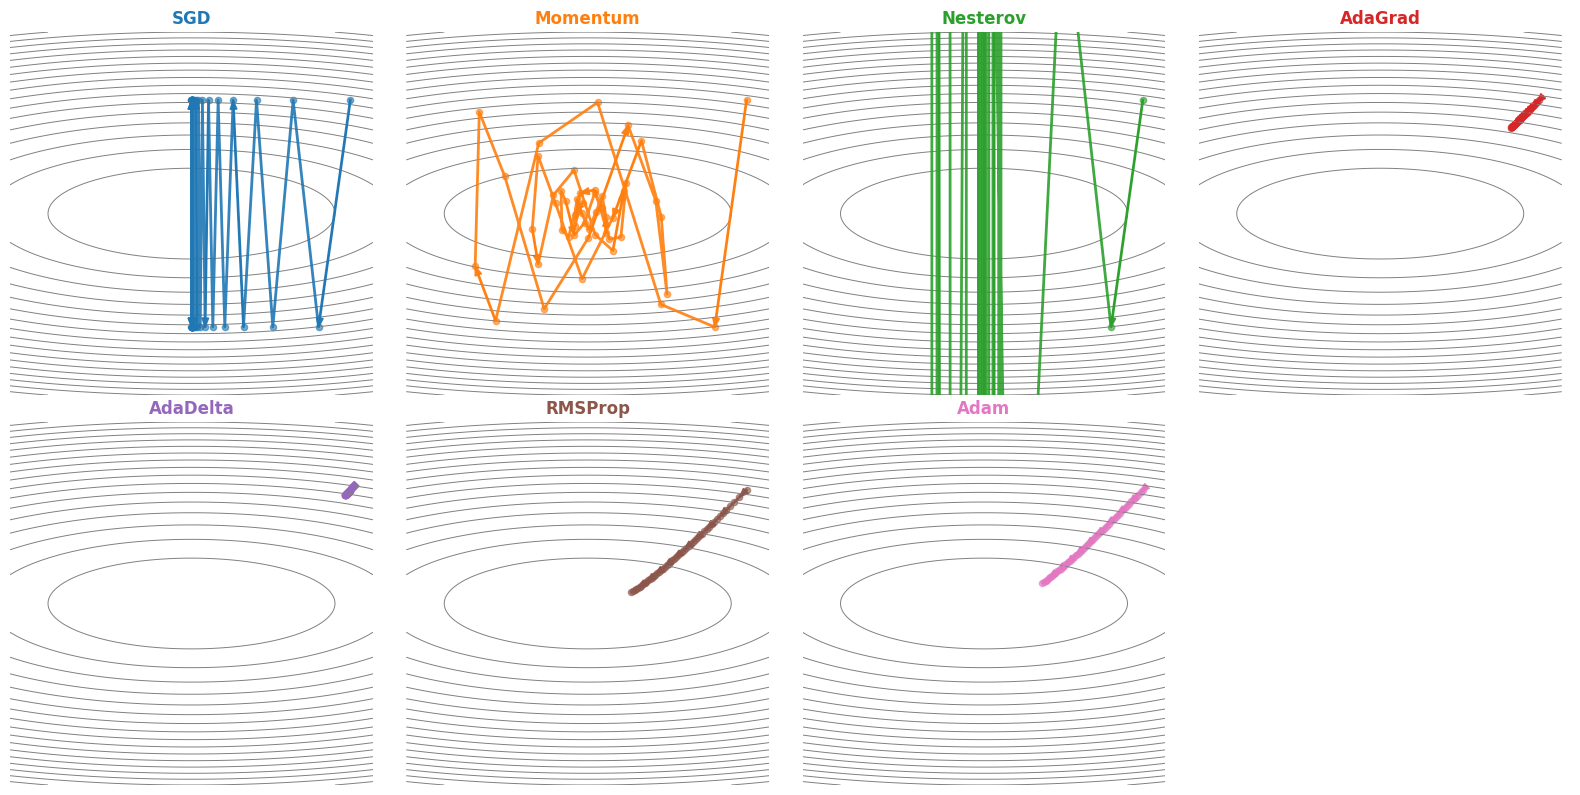

In [4]:
#  Define loss function and gradient
def grad_convex(x):
    return np.array([2 * x[0], 20 * x[1]])

# Contour function
def convex_loss_fn(x, y):
    return x**2 + 10*y**2

# Function to draw contour
def plot_convex_contour(ax):
    x = np.linspace(-8, 8, 400)
    y = np.linspace(-8, 8, 400)
    X, Y = np.meshgrid(x, y)
    Z = convex_loss_fn(X, Y)
    ax.contour(X, Y, Z, levels=20, colors='gray', linewidths=0.7)

# Function to visualize optimization trajectory
def plot_convex_trajectory(ax, trace, name):
    plot_convex_contour(ax)
    color = optimizer_colors[name]
    ax.plot(trace[:, 0], trace[:, 1], color=color, linewidth=2, alpha=0.9)
    ax.scatter(trace[:, 0], trace[:, 1], color=color, s=20, alpha=0.6)
    for i in range(0, len(trace)-1, max(1, len(trace)//10)):
        start = trace[i]
        end = trace[i+1]
        dx, dy = end - start
        ax.arrow(start[0], start[1], dx, dy,
                 head_width=0.3, head_length=0.4, fc=color, ec=color,
                 length_includes_head=True, alpha=0.9)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(name, fontsize=12, fontweight='bold', color=color)

# Execute
x0_convex = [7.0, 5.0]
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

for i, (name, fn) in enumerate(optimizer_functions.items()):
    traj = fn(x0_convex, 0.1, grad_convex)
    plot_convex_trajectory(axs[i], traj, name)

axs[-1].axis('off')
plt.tight_layout()
plt.show()

# **A simple toy dataset**

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. Make Dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

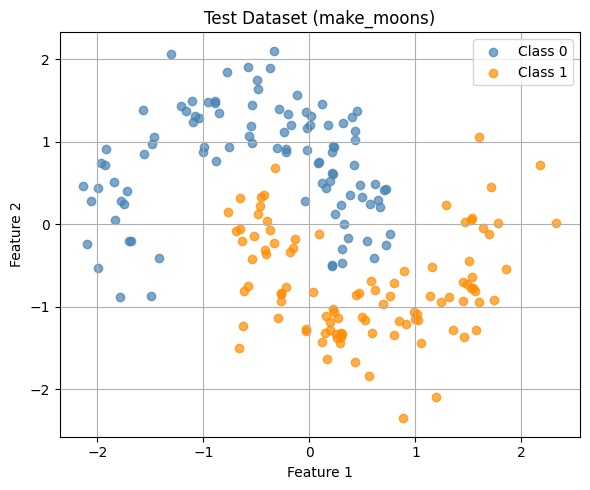

In [2]:
import matplotlib.pyplot as plt

# NumPy로 변환
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy().ravel()

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(X_test_np[y_test_np == 0][:, 0], X_test_np[y_test_np == 0][:, 1], 
            color='steelblue', label='Class 0', alpha=0.7)
plt.scatter(X_test_np[y_test_np == 1][:, 0], X_test_np[y_test_np == 1][:, 1], 
            color='darkorange', label='Class 1', alpha=0.7)

plt.title("Test Dataset (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# 2. Define network
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [4]:
# Training function
def train_model(optimizer_name, epochs=50):
    model = SimpleMLP()
    criterion = nn.BCELoss()

    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.1)
    elif optimizer_name == 'Momentum':
        optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
    elif optimizer_name == 'NAG':
        optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, nesterov=True)
    elif optimizer_name == 'AdaGrad':
        optimizer = optim.Adagrad(model.parameters(), lr=0.1)
    elif optimizer_name == 'RMSProp':
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer_name == 'AdaDelta':
        optimizer = optim.Adadelta(model.parameters(), lr=1.0)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optimizer_name == 'NAdam':
        optimizer = optim.NAdam(model.parameters(), lr=0.01)
    elif optimizer_name == 'RAdam':
        optimizer = optim.RAdam(model.parameters(), lr=0.01)
    elif optimizer_name == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=0.01)
    else:
        raise ValueError("Unsupported optimizer")

    loss_history = []
    acc_history = []

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            preds = model(xb)
            loss = criterion(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            preds = model(X_test_tensor)
            acc = ((preds > 0.5) == y_test_tensor).float().mean().item()
            loss_val = criterion(preds, y_test_tensor).item()
            loss_history.append(loss_val)
            acc_history.append(acc)

    return loss_history, acc_history

In [5]:
# Execute
optimizer_names = ['SGD', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'AdaDelta', 'Adam']
results = {opt: train_model(opt) for opt in optimizer_names}

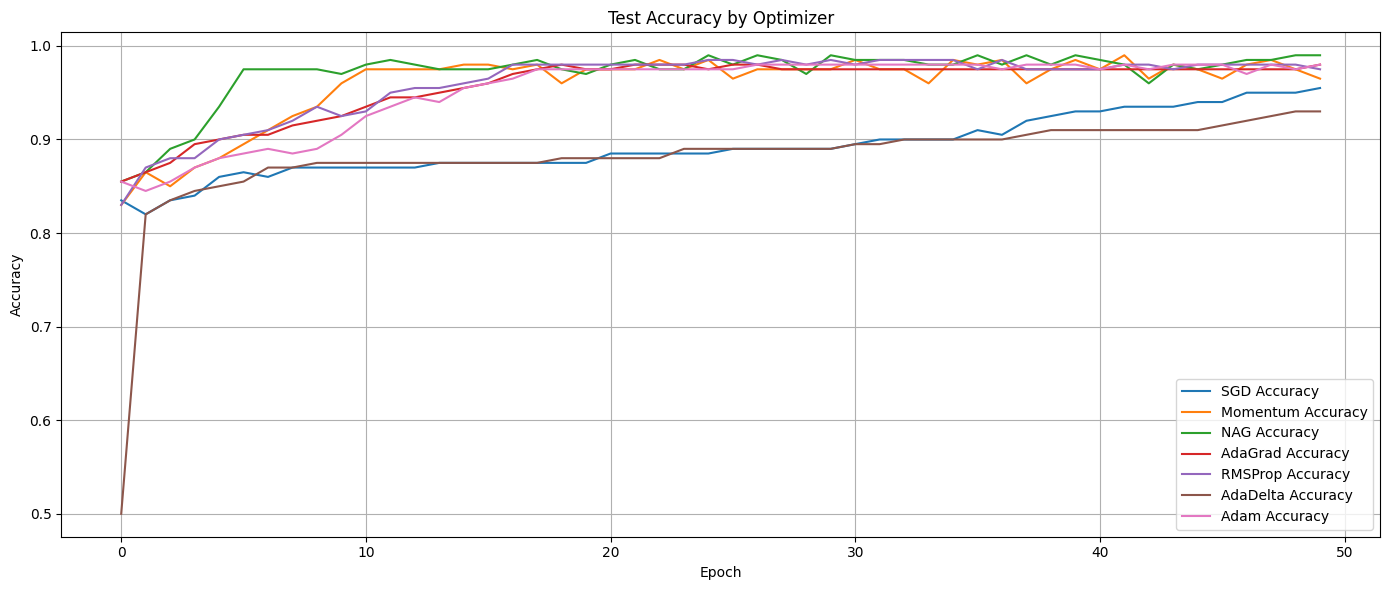

In [6]:
# Visualization
plt.figure(figsize=(14, 6))
for opt in optimizer_names:
    plt.plot(results[opt][1], label=f'{opt} Accuracy')
plt.title('Test Accuracy by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **CIFAR-10**

100.0%
/home/nara/streamlit/env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nara/streamlit/env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[SGD] Epoch 1/30 - Loss: 2.1226, Accuracy: 23.63%
[SGD] Epoch 2/30 - Loss: 1.8452, Accuracy: 30.96%
[SGD] Epoch 3/30 - Loss: 1.7041, Accuracy: 36.82%
[SGD] Epoch 4/30 - Loss: 1.5962, Accuracy: 37.19%
[SGD] Epoch 5/30 - Loss: 1.5048, Accuracy: 40.73%
[SGD] Epoch 6/30 - Loss: 1.4247, Accuracy: 32.28%
[SGD] Epoch 7/30 - Loss: 1.3488, Accuracy: 35.96%
[SGD] Epoch 8/30 - Loss: 1.2612, Accuracy: 39.73%
[SGD] Epoch 9/30 - Loss: 1.1804, Accuracy: 39.23%
[SGD] Epoch 10/30 - Loss: 1.1035, Accuracy: 44.60%
[SGD] Epoch 11/30 - Loss: 1.0173, Accuracy: 42.87%
[SGD] Epoch 12/30 - Loss: 0.9169, Accuracy: 46.36%
[SGD] Epoch 13/30 - Loss: 0.8204, Accuracy: 34.50%
[SGD] Epoch 14/30 - Loss: 0.7321, Accuracy: 38.32%
[SGD] Epoch 15/30 - Loss: 0.6325, Accuracy: 39.46%
[SGD] Epoch 16/30 - Loss: 0.5353, Accuracy: 38.84%
[SGD] Epoch 17/30 - Loss: 0.4243, Accuracy: 44.39%
[SGD] Epoch 18/30 - Loss: 0.3361, Accuracy: 38.34%
[SGD] Epoch 19/30 - Loss: 0.2706, Accuracy: 23.79%
[SGD] Epoch 20/30 - Loss: 0.2153, Accura

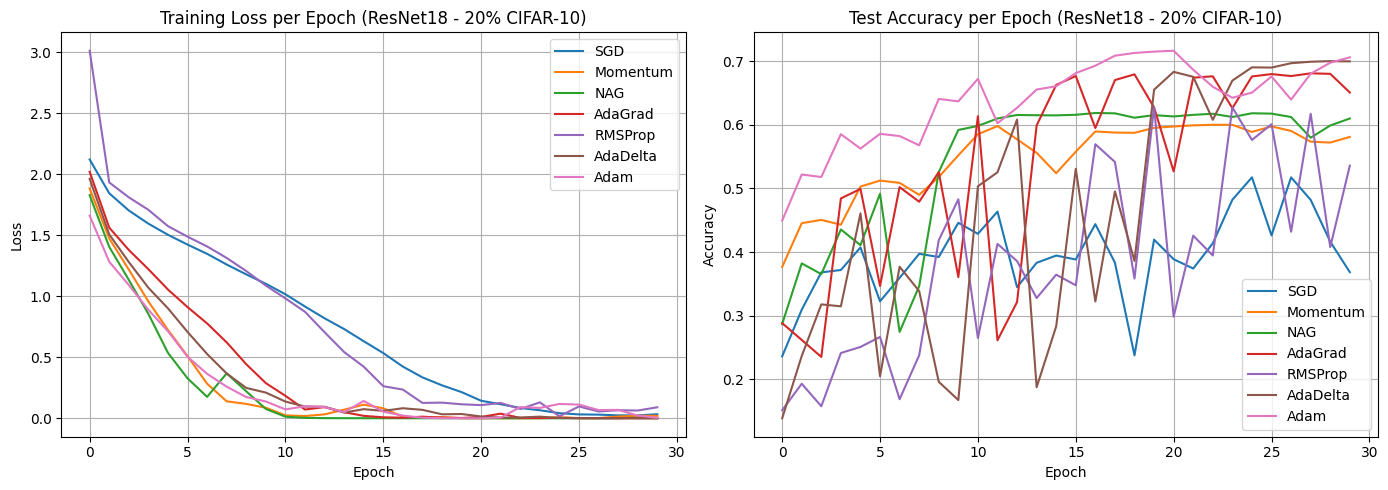

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
import matplotlib.pyplot as plt

# --- 1. Prepare Data (Use only 20% of CIFAR-10 for training) ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Take 20% of training data
train_len = int(len(full_train) * 0.2)  # 20%
subset_train, _ = random_split(full_train, [train_len, len(full_train) - train_len])

trainloader = DataLoader(subset_train, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

# --- 2. Define ResNet18 ---
class ResNet18(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.resnet18(pretrained=False)
        base.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        base.maxpool = nn.Identity()
        base.fc = nn.Linear(512, 10)
        self.model = base

    def forward(self, x):
        return self.model(x)

# --- 3. Training function ---
def train_model(optimizer_name, device='cuda' if torch.cuda.is_available() else 'cpu', epochs=30):
    model = ResNet18().to(device)
    criterion = nn.CrossEntropyLoss()

    optimizers = {
        'SGD': optim.SGD(model.parameters(), lr=0.01),
        'Momentum': optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
        'NAG': optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
        'AdaGrad': optim.Adagrad(model.parameters(), lr=0.01),
        'RMSProp': optim.RMSprop(model.parameters(), lr=0.01),
        'AdaDelta': optim.Adadelta(model.parameters(), lr=1.0),
        'Adam': optim.Adam(model.parameters(), lr=0.001)
    }

    optimizer = optimizers[optimizer_name]
    loss_list = []
    acc_list = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for xb, yb in trainloader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        loss_list.append(running_loss / len(trainloader))

        # Evaluation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for xb, yb in testloader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb).argmax(dim=1)
                correct += (preds == yb).sum().item()
                total += yb.size(0)
        acc_list.append(correct / total)

        print(f"[{optimizer_name}] Epoch {epoch+1}/{epochs} - Loss: {loss_list[-1]:.4f}, Accuracy: {acc_list[-1]*100:.2f}%")

    return loss_list, acc_list

# --- 4. Execute training for each optimizer ---
optimizers = ['SGD', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'AdaDelta', 'Adam']
results_loss = {}
results_acc = {}

for opt in optimizers:
    l, a = train_model(opt, epochs=30)
    results_loss[opt] = l
    results_acc[opt] = a

# --- 5. Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for opt in optimizers:
    ax1.plot(results_loss[opt], label=opt)
    ax2.plot(results_acc[opt], label=opt)

ax1.set_title("Training Loss per Epoch (ResNet18 - 20% CIFAR-10)")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

ax2.set_title("Test Accuracy per Epoch (ResNet18 - 20% CIFAR-10)")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()